### Load Suara Ke Librosa dan Menghitung nilai MFCC
#### MFCC (Mel-frequency cepstral coefficients) dihitung dalam bentuk 2D array (List) 

In [307]:
import librosa
import librosa.display as display
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

y1, sr1 = librosa.load('bacaan/ustazah/b&t/b2.wav',sr=48000) #load bacaan ustazah ke librosa
y2, sr2 = librosa.load('coba.wav',sr=48000) #load bacaan pengujian ke librosa

# print(y1)
# print(len(y1))
# print(len(y2))

# len_sound1 = len(y1)
# len_sound2 = len(y2)

# if(len_sound1 > len_sound2):
#     y2 = librosa.util.fix_length(y2, size=len_sound1)
# else:
#     y1 = librosa.util.fix_length(y1, size=len_sound2)


# plt.subplot(1, 2, 1) 
mfcc1 = librosa.feature.mfcc(y1,sr1)   #Computing MFCC values , mengubah suara menjadi 2D array
# print(mfcc1)
# # print(mfcc1)
# display.specshow(mfcc1)

# plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2,sr2)  #Computing MFCC values , mengubah suara menjadi 2D array
# # print(mfcc2)
# display.specshow(mfcc2)

# librosa.get_duration(y=y1, sr=sr1)


In [308]:
# librosa.get_duration(y=y2, sr=sr2)

#### Menampilkan visualisasi suara 1 dalam bentuk  waveshow 

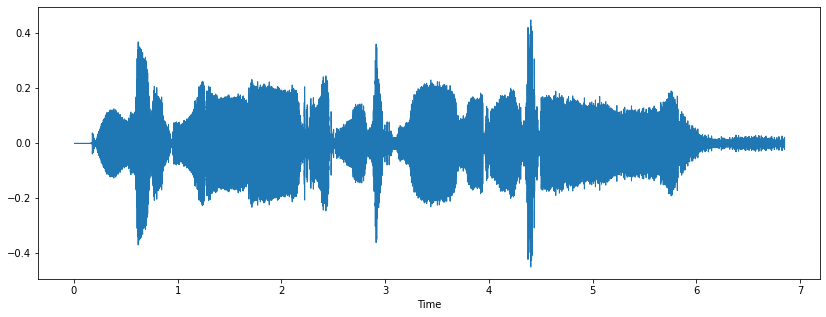

In [309]:
# fig, ax = plt.subplots()
plt.figure(figsize=(14, 5))
display.waveshow(y1, sr=sr1)
plt.savefig('spec.png')

#### Menampilkan visualisasi suara 2 dalam bentuk  waveshow 

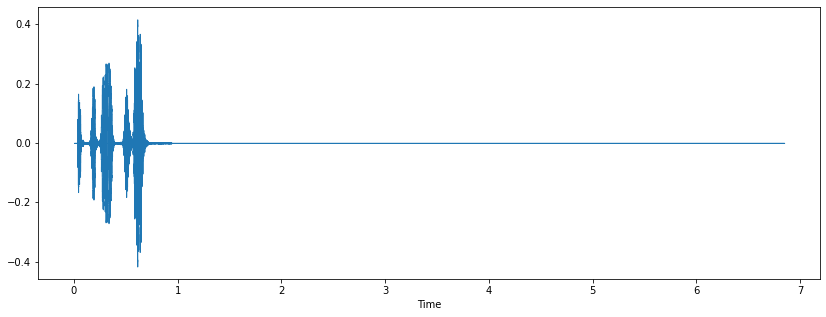

In [310]:
plt.figure(figsize=(14, 5))
display.waveshow(y2, sr=sr2)
plt.savefig('spec1.png')

#### Menghitung jarak normlisasi antara dua suara
#### Semakin dekat dengan angka 0, semakin mirip/sama kedua suara tersebut

In [311]:
# from dtw import dtw
# from numpy.linalg import norm

# dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
# print('Normalized distance between the two sounds: '+ dist.__str__())

#### Menghitung kesamaan/kemiripan dua suara dengan rumus cosine_similarity

In [312]:


def dot(A,B): 
    return (sum(a*b for a,b in zip(A,B))) #rumus cosine similarity

def cosine_similarity(a,b):
    return dot(a,b) / ( (dot(a,a) **.5) * (dot(b,b) ** .5) ) #rumus cosine similarity

# from math import*
# def euclidean_distance(x,y):
#     return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
  
# def manhattan_distance(x,y):
#     return sum(abs(a-b) for a,b in zip(x,y))

# def jaccard_similarity(x,y):
 
#     intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
#     union_cardinality = len(set.union(*[set(x), set(y)]))
#     return intersection_cardinality/float(union_cardinality)

# def square_rooted(x):
 
#     return round(sqrt(sum([a*a for a in x])),3)
 
# def cosine_similarity(x,y):
 
#     numerator = sum(a*b for a,b in zip(x,y))
#     denominator = square_rooted(x)*square_rooted(y)
#     return round(numerator/float(denominator),3)

array1 = [] 
for nums in mfcc1:
    for val in nums:
        array1.append(val) # mengubah 2D array menjadi 1D array
        
# print(array1)
        
array2 = []
for nums in mfcc2:
    for val in nums:
        array2.append(val) # mengubah 2D array menjadi 1D array
        

print(cosine_similarity(array1, array2))


# print(jaccard_similarity(array1, array2))

0.8781866567291359


In [313]:
# from scipy.spatial.distance import cosine,cityblock,euclidean,minkowski,jaccard
# print(jaccard(array1,array2))

1.0
